In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import cross_val_score, validation_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [20]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='utf-8', ngram_range=(1, 3), stop_words='english')


In [8]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...


In [21]:
X_train = []
X_test = []
Y_train = []
Y_test = []
X_valid = []
Y_valid = []

In [22]:
male = []
female = []

In [23]:
with open(r'data/training_set.txt') as training:
    for line in training:
        line = line.strip()
        lnum, chr_id, movie_id, chr_name, chr_gender, line_text, credit_list = line.split("+++$+++")
        chr_gender = chr_gender.strip()
#         ss = sid.polarity_scores(line_text)
#         sentiment = ss['compound']
        if(chr_gender.lower() == "m"):
            X_train.append(line_text)
            male.append(line_text)
            Y_train.append(0)
        elif(chr_gender.lower() == "f"):
            X_train.append(line_text)
            female.append(line_text)
            Y_train.append(1)


with open(r'data/test_set.txt') as test:
    for line in test:
        line = line.strip()
        lnum, chr_id, movie_id, chr_name, chr_gender, line_text, credit_list = line.split("+++$+++")
        chr_gender = chr_gender.strip()
#         ss = sid.polarity_scores(line_text)
#         sentiment = ss['compound']
        if(chr_gender.lower() == "m"):
            X_test.append(line_text)
            male.append(line_text)
            Y_test.append(0)
        elif(chr_gender.lower() == "f"):
            X_test.append(line_text)
            female.append(line_text)
            Y_test.append(1)




with open(r'data/validation_set.txt') as valid:
    for line in valid:
        line = line.strip()
        lnum, chr_id, movie_id, chr_name, chr_gender, line_text, credit_list = line.split("+++$+++")
        chr_gender = chr_gender.strip()
#         ss = sid.polarity_scores(line_text)
#         sentiment = ss['compound']
        if(chr_gender.lower() == "m"):
            X_valid.append(line_text)
            male.append(line_text)
            Y_valid.append(0)
        elif(chr_gender.lower() == "f"):
            X_valid.append(line_text)
            female.append(line_text)
            Y_valid.append(1)


In [24]:
X = X_train + X_test + X_valid
Y = Y_train + Y_test + Y_valid

In [25]:
indices = []
for i in range(len(X)):
  if(len(X[i]) > 0):
    answer = True 
  else:
    indices.append(i)

for index in sorted(indices, reverse=True):
    del X[index]
    del Y[index]

In [26]:
df = pd.DataFrame()

df['text'] = X
df['target'] = Y

In [27]:
def get_top_data(top_n = 30000):
  top_data_df_male = df[df['target'] == 0].head(top_n)
  top_data_df_female = df[df['target'] == 1].head(top_n)
  data_df_small = pd.concat([top_data_df_male, top_data_df_female])
  return data_df_small

top_data_df_small = get_top_data(top_n=Y.count(1))

In [28]:
from sklearn.model_selection import train_test_split
def split_train_test(top_data_df_small, test_size=0.1, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(top_data_df_small[['text']], 
                                                        top_data_df_small['target'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=15)
    print("Value counts for Train genders")
    print(Y_train.value_counts())
    print("Value counts for Test genders")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    # print(X_train.head())
    return X_train, X_test, Y_train, Y_test

In [29]:
X_train, X_test, Y_train, Y_test = split_train_test(df)
X_train = X_train['text']
Y_train = Y_train['target']
X_test = X_test['text']
Y_test = Y_test['target']

Value counts for Train genders
0    153706
1     64114
Name: target, dtype: int64
Value counts for Test genders
0    17062
1     7141
Name: target, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [135]:
len(X)

242023

In [92]:
count_vect = CountVectorizer(ngram_range=(1,3))

X_train_counts = count_vect.fit_transform(X)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print("Count Vectorized")

Count Vectorized


In [93]:
sentimentX = []
for line in X:
    ss = sid.polarity_scores(line)
    sentiment = ss['compound']
    sentimentX.append(sentiment)

In [94]:
#Add proportion of proper noun to total as something soon as well!

In [95]:
X_train_counts

<242023x1834555 sparse matrix of type '<class 'numpy.int64'>'
	with 6176735 stored elements in Compressed Sparse Row format>

In [96]:
i = 0
for element in X_train_tfidf:
    i = i+1
print(i)

242023


In [97]:
len(sentimentX)

242023

In [124]:
newX = []
i = 0
for element in X_train_tfidf:
    newX.append([np.asarray(element), sentimentX[i]])
    i+=1

In [126]:
len(Y) == len(newX)
newX = np.array(newX)
print(newX[0][0])

  (0, 1500513)	0.2433731570436441
  (0, 356084)	0.2156126519055497
  (0, 1008864)	0.22375785000171086
  (0, 1502206)	0.4711975995773497
  (0, 358832)	0.4524910763380799
  (0, 1502251)	0.6460942371809453


In [136]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(alpha=1.1),
    LogisticRegression(C=1e2, random_state=0, fit_intercept=False, solver='sag', max_iter=500),
]

In [202]:
from scipy.sparse import csr_matrix, hstack
from scipy import sparse

sA = sparse.csr_matrix(sentimentX)
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
c = sA.tocoo()
c.data
d = X_train_tfidf
print(len(d.data), len(c.data))
d.data

6176735 126142


array([0.24337316, 0.21561265, 0.22375785, ..., 0.35056213, 0.56260955,
       0.60634404])

In [167]:
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train_tfidf, Y, scoring='accuracy', cv=10)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
    
    print(model_name + " done testing")

KeyboardInterrupt: 

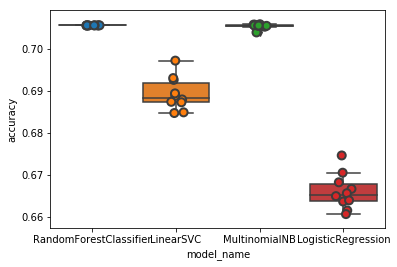

In [139]:
cv_df.to_csv('data/largedata10cv.csv')
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.savefig('figures/models/largedata10cv.png')
plt.show()
plt.close()

In [140]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.705574
1,RandomForestClassifier,1,0.705574
2,RandomForestClassifier,2,0.705574
3,RandomForestClassifier,3,0.705574
4,RandomForestClassifier,4,0.705574
5,RandomForestClassifier,5,0.705603
6,RandomForestClassifier,6,0.705603
7,RandomForestClassifier,7,0.705603
8,RandomForestClassifier,8,0.705591
9,RandomForestClassifier,9,0.705591
